In [1]:
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import random
%matplotlib inline

In [2]:
data = load_boston()

In [3]:
X, y = data['data'], data['target']

In [4]:
data['data'].shape

(506, 13)

In [5]:
house_data = data['data']
true_prices = data['target']

In [13]:
def get_prices(k, b, x):
    return np.dot(x, k) + b
def get_loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [7]:
# random k and b
best_random_k = np.zeros([13,1])
best_random_b = 0
lowest_loss = 10000000000

for i in range(10000):
    k = np.random.random([13,1])*200 - 100
    b = np.random.random() * 200 - 100
    predicts = get_prices(k, b, house_data)
    loss = np.sum(np.absolute(predicts - true_prices))
    if loss < lowest_loss:
        lowest_loss = loss
        best_random_k = k
        best_random_b = b
        #print('got new best: k=\n{0}b=\n{1}loss=\n{2}'.format(k, b, loss))
        print('****got new best: loss={0}'.format(loss))
    if i % 1000 == 0:
        print(str(i)+'/10000\r')
print('10000/10000')

****got new best: loss=2921409168.673875
0/10000
****got new best: loss=2846844697.7776356
****got new best: loss=2214042031.150503
****got new best: loss=1380763120.4529064
****got new best: loss=1127808895.2537127
****got new best: loss=590743341.4519572
****got new best: loss=351761324.0896674
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
****got new best: loss=276415045.8771086
6000/10000
7000/10000
8000/10000
****got new best: loss=269402322.9143706
9000/10000
10000/10000


In [83]:
#supervised direction
def get_random_directions(k_length):
    k = [random.choice([1, -1]) for x in range(k_length)]
    return np.array(k)
                      
k = best_directed_k = np.zeros(13)
b = best_directed_b = 0

step = 0.05
epoch = 100000
current_k_directions = get_random_directions(13)
current_b_direction = random.choice([1, -1])
lowest_loss = 10000000000000

for i in range(epoch):
    k += current_k_directions * step
    b += current_b_direction * step
    predicts = get_prices(k, b, house_data)
    loss = get_loss(true_prices, predicts)
    if i % (epoch/10) == 0:
        #print(str(step))
        #print('current loss is:{0}\nlowest loss so far is:{1}\n{2}/{3}'.format(loss, lowest_loss, i, epoch))
        step *= 0.99
    if loss < lowest_loss:
        lowest_loss = loss
        best_directed_k = k
        best_directed_b = b
        print('new lowest loss:{0} at {1}'.format(lowest_loss, i))
    else:
        current_k_directions = get_random_directions(13)
        current_b_direction = random.choice([1, -1])
print(lowest_loss)

new lowest loss:4017.6497587982076 at 0
new lowest loss:3728.092997644289 at 7
new lowest loss:512.7353780933474 at 8
512.7353780933474


In [148]:
# supervised learning
def partial_k(x, y, y_hat):
    n = len(y)
    gradient = np.dot((y-y_hat), x)
    
    return -2 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)
    gradient = 0
    gradient = np.sum(y - y_hat)
    
    return -2 / n * gradient

k = best_supervised_k = [random.random() * 200 - 100 for i in range(13)]
b = best_supervised_b = random.random() * 200 - 100

step = 1e-6
epoch = 1000000
lowest_loss = 10000000000000

for i in range(epoch):
    predicts = get_prices(k, b, house_data)
    k -= partial_k(house_data, true_prices, predicts) * step
    b -= partial_b(house_data, true_prices, predicts) * step
    loss = get_loss(true_prices, predicts)
    if i % 5000 == 0:
        print(loss)
    if loss < lowest_loss:
        lowest_loss = loss
        best_directed_k = k
        best_directed_b = b
        if i % (epoch/10) == 0:
            print('new lowest loss:{0} at {1}'.format(lowest_loss, i))
print(lowest_loss)

1622469394.2629418
new lowest loss:1622469394.2629418 at 0
76248.83307615589
54955.589980339064
40658.520215632794
30615.08356243068
23390.89695749404
18097.013154910328
14158.890666512754
11192.564737767389
8934.426929086121
7199.490710715555
5855.581268753105
4806.8299237837555
3982.8157252512715
3331.248021581762
2812.932855121713
2398.2490007331694
2064.6435545198424
1794.8290879505914
1575.4714541290136
1396.22557575587
new lowest loss:1396.22557575587 at 100000
1249.0210162981361
1127.5287113170154
1026.7602697718646
942.7650479180766
872.3998321379086
813.1527800989121
763.0081397803199
720.3417793534567
683.8401157102379
652.4368999532796
625.2636959634466
601.6109085310777
580.8969769430432
562.6439177137344
546.457826548916
532.0132712138715
519.040750525604
507.3165799069989
496.65470538647634
486.9000563974865
new lowest loss:486.9000563974865 at 200000
477.92313126568985
469.6155738742083
461.8865501712668
454.659772318578
447.8710489310838
441.4662639684722
435.3997058810

/Users/sinong/anaconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sinong/anaconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


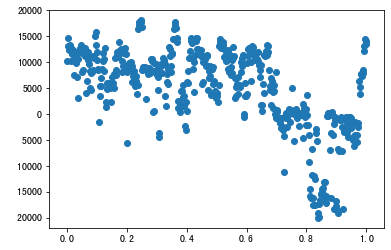

In [162]:
predicts = get_prices(best_supervised_k, best_supervised_b, house_data)
plt.scatter(np.linspace(0, 1, len(predicts)), predicts)

In [166]:
len([x for x in predicts if x < 0])

122

In [168]:
house_data[:,5]

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,